In [1]:
REPO_DIR = "..."

import os
import pandas as pd
os.chdir(REPO_DIR)
responses = pd.read_csv("output/questionnaire/responses.processed.group_1.csv", index_col=0)
responses

,block_id,user_id,model,category,sentence,score
0,0,0,gpt3_CFSLH-B_hum_eval.predictions.txt,perspective,`` Con Ashley muore un'altra vittima innocente...,0
1,0,1,gpt3_CFSLH-B_hum_eval.predictions.txt,perspective,`` Con Ashley muore un'altra vittima innocente...,2
2,0,2,gpt3_CFSLH-B_hum_eval.predictions.txt,perspective,`` Con Ashley muore un'altra vittima innocente...,1
3,0,3,gpt3_CFSLH-B_hum_eval.predictions.txt,perspective,`` Con Ashley muore un'altra vittima innocente...,8
4,0,0,mbart_info_src_sh.txt,perspective,"Un uomo di origini africane , Cheik Tidiane , ...",4
...,...,...,...,...,...,...
2787,49,3,gpt3_0SLH_hum_eval.predictions.txt,similarity,Uccide la moglie mentre dormiva : fiaccolata a...,7
2788,49,0,mbart_src_info_sh.txt,similarity,Raccogliamo la fiaccola per le donne uccise da...,0
2789,49,1,mbart_src_info_sh.txt,similarity,Raccogliamo la fiaccola per le donne uccise da...,5
2790,49,2,mbart_src_info_sh.txt,similarity,Raccogliamo la fiaccola per le donne uccise da...,0


### Mean scores

                                          score
model                                          
gpt3_0SLH_hum_eval.predictions.txt     2.770000
gpt3_CFSLH-B_hum_eval.predictions.txt  3.840000
gpt3_CFSLH_hum_eval.predictions.txt    3.570000
gpt3_FSLH_hum_eval.predictions.txt     2.076531
mbart_info_src_sh.txt                  4.500000
mbart_src_info_sh.txt                  2.500000
mbart_unsupervised.txt                 2.135000


<AxesSubplot:xlabel='model'>

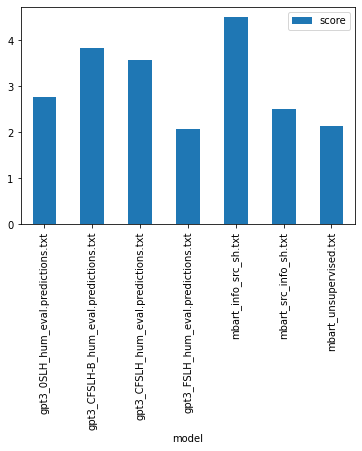

In [2]:
persp_mean = (
    responses[responses["category"] == "perspective"]
    .groupby("model")
    .agg({"score": "mean"})
)

print(persp_mean)

persp_mean.plot.bar()

                                          score
model                                          
gpt3_0SLH_hum_eval.predictions.txt     6.515000
gpt3_CFSLH-B_hum_eval.predictions.txt  6.595000
gpt3_CFSLH_hum_eval.predictions.txt    7.965000
gpt3_FSLH_hum_eval.predictions.txt     8.173469
mbart_info_src_sh.txt                  3.615000
mbart_src_info_sh.txt                  6.780000
mbart_unsupervised.txt                 7.715000


<AxesSubplot:xlabel='model'>

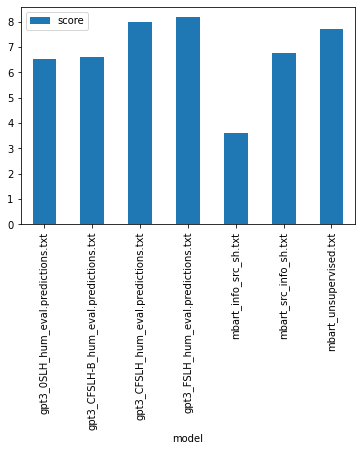

In [3]:
sim_mean = (
    responses[responses["category"] == "similarity"]
    .groupby("model")
    .agg({"score": "mean"})
)

print(sim_mean)

sim_mean.plot.bar()

### Agreement

<AxesSubplot:xlabel='model'>

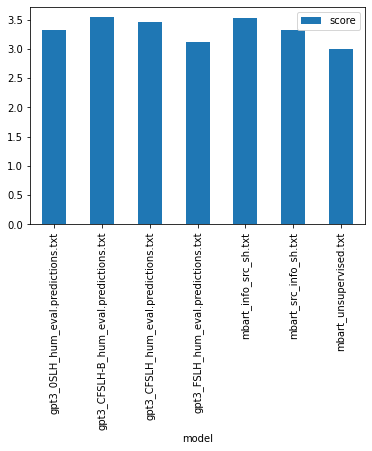

In [4]:
(
    responses[responses["category"] == "perspective"]
    .groupby("model")
    .agg({"score": "std"})
    .plot.bar()
)

<AxesSubplot:xlabel='model'>

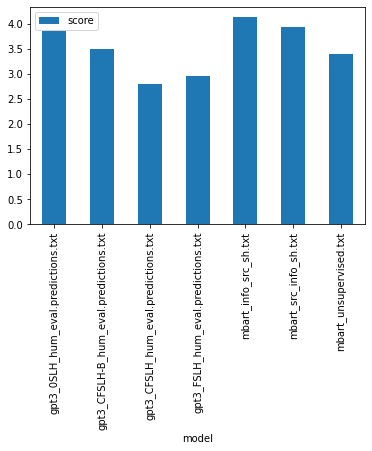

In [5]:
(
    responses[responses["category"] == "similarity"]
    .groupby("model")
    .agg({"score": "std"})
    .plot.bar()
)

In [6]:
from scipy import stats

<AxesSubplot:xlabel='user_id'>

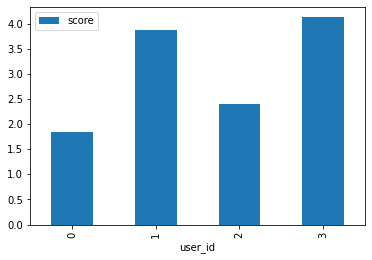

In [7]:
(
    responses[responses["category"] == "perspective"]
    .groupby("user_id")
    .agg({"score": "mean"})
    .plot.bar()
)

<AxesSubplot:xlabel='user_id'>

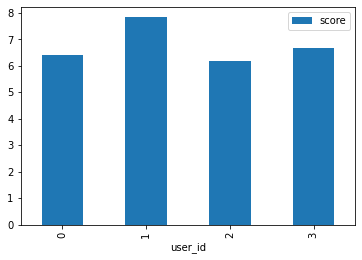

In [8]:
(
    responses[responses["category"] == "similarity"]
    .groupby("user_id")
    .agg({"score": "mean"})
    .plot.bar()
)

#### Perspective scores

In [9]:
import numpy as np
from rich import print

observations = np.array(
    responses
    [(responses["category"] == "perspective")]
    .groupby("user_id")
    ["score"]
    .apply(np.array)
    .to_list()
).T

print(observations)
print(observations.shape)
corr, p_vals = stats.spearmanr(observations)
print(corr)
print(p_vals)

[[ 0  2  1  8]
 [ 4 10  9  0]
 [ 0  2  0  3]
 ...
 [ 0  0  0  4]
 [ 3  0  6  5]
 [ 0  0  0  6]]

(349, 4)

[[1.         0.45895677 0.60927301 0.30253576]
 [0.45895677 1.         0.49446431 0.46978757]
 [0.60927301 0.49446431 1.         0.37734469]
 [0.30253576 0.46978757 0.37734469 1.        ]]

[[0.00000000e+00 1.38756162e-19 7.67118030e-37 8.05689249e-09]
 [1.38756162e-19 0.00000000e+00 6.42312643e-23 1.46554279e-20]
 [7.67118030e-37 6.42312643e-23 0.00000000e+00 2.97439833e-13]
 [8.05689249e-09 1.46554279e-20 2.97439833e-13 0.00000000e+00]]

In [10]:
p_vals < 0.0001

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

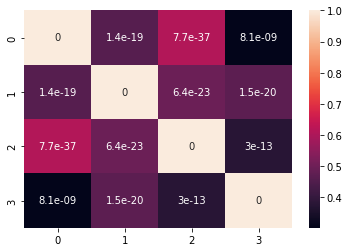

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, annot=p_vals)
plt.show()

In [12]:
from statsmodels.stats import inter_rater as irr

arr, categories = irr.aggregate_raters(observations)
irr.fleiss_kappa(arr)

0.08326593776282588

#### Similarity scores

In [13]:
observations = np.array(
    responses
    [(responses["category"] == "similarity")]
    .groupby("user_id")
    ["score"]
    .apply(np.array)
    .to_list()
).T

print(observations)
print(observations.shape)
corr, p_vals = stats.spearmanr(observations)
print(corr)
print(p_vals)

[[ 6  5  2  2]
 [ 0  1  1  3]
 [ 6 10 10  1]
 ...
 [ 0  5  0  4]
 [ 9  5 10  7]
 [ 0  5  0  5]]

(349, 4)

[[1.         0.50030824 0.64098834 0.54332611]
 [0.50030824 1.         0.42866942 0.47449297]
 [0.64098834 0.42866942 1.         0.56294418]
 [0.54332611 0.47449297 0.56294418 1.        ]]

[[0.00000000e+00 1.66233932e-23 9.01535822e-42 3.40850876e-28]
 [1.66233932e-23 0.00000000e+00 4.95007654e-17 5.38188826e-21]
 [9.01535822e-42 4.95007654e-17 0.00000000e+00 1.44777131e-30]
 [3.40850876e-28 5.38188826e-21 1.44777131e-30 0.00000000e+00]]

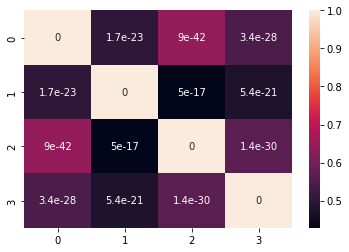

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, annot=p_vals)
plt.show()

In [15]:
p_vals < 0.05

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [16]:
p_vals < 0.005

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [17]:
p_vals < 0.0001

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [18]:
arr, categories = irr.aggregate_raters(observations)
irr.fleiss_kappa(arr)


0.11011254741726148

## Correlation with auto eval

In [19]:
rouge = pd.read_excel("output/huiyuan-auto-eval/rouge_1.xlsx", index_col=0)
rouge.head()

,src-tgt,src-gpt3_0SLH_hum_eval.predictions.txt,src-gpt3_CFSLH-B_hum_eval.predictions.txt,src-gpt3_CFSLH_hum_eval.predictions.txt,src-gpt3_FSLH_hum_eval.predictions.txt,src-mbart_info_src_sh.txt,src-mbart_src_info_sh.txt,src-mbart_unsupervised.txt,tgt-gpt3_0SLH_hum_eval.predictions.txt,tgt-gpt3_CFSLH-B_hum_eval.predictions.txt,tgt-gpt3_CFSLH_hum_eval.predictions.txt,tgt-gpt3_FSLH_hum_eval.predictions.txt,tgt-mbart_info_src_sh.txt,tgt-mbart_src_info_sh.txt,tgt-mbart_unsupervised.txt
0,0.06688,0.81250,0.20779,0.83636,0.73684,0.10526,0.80597,0.94737,0.10436,0.06958,0.06832,0.07989,0.20793,0.05453,0.07545
1,0.09113,0.66667,0.20000,0.44444,0.30769,0.11429,0.09524,0.61538,0.10151,0.16075,0.08438,0.11048,0.18020,0.21472,0.03301
2,0.21608,0.00000,0.22222,0.75000,0.35000,0.05714,0.85714,0.51852,0.04903,0.10727,0.19664,0.12226,0.13085,0.22201,0.16257
3,0.04255,0.28571,0.42857,0.30769,0.25000,0.11111,0.71429,0.61538,0.00000,0.08163,0.04167,0.07843,0.03774,0.04082,0.04167
4,0.06897,0.34783,0.17391,0.52632,0.94118,0.13333,0.94737,0.63636,0.05882,0.05882,0.00000,0.07143,0.29268,0.06667,0.18182


In [29]:
bleu = pd.read_excel("output/huiyuan-auto-eval/bleu_1.xlsx", index_col=0)
bleu.head()

,src-tgt,src-gpt3_0SLH_hum_eval.predictions.txt,src-gpt3_CFSLH-B_hum_eval.predictions.txt,src-gpt3_CFSLH_hum_eval.predictions.txt,src-gpt3_FSLH_hum_eval.predictions.txt,src-mbart_info_src_sh.txt,src-mbart_src_info_sh.txt,src-mbart_unsupervised.txt,tgt-gpt3_0SLH_hum_eval.predictions.txt,tgt-gpt3_CFSLH-B_hum_eval.predictions.txt,tgt-gpt3_CFSLH_hum_eval.predictions.txt,tgt-gpt3_FSLH_hum_eval.predictions.txt,tgt-mbart_info_src_sh.txt,tgt-mbart_src_info_sh.txt,tgt-mbart_unsupervised.txt
0,0.00380,0.46037,0.05591,0.77745,0.56163,0.00857,0.63333,0.88279,0.00520,0.00475,0.00594,0.00477,0.05015,0.00482,0.00546
1,0.01031,0.03391,0.01699,0.02197,0.10446,0.00565,0.01080,0.51697,0.00453,0.01205,0.01283,0.01321,0.03455,0.05668,0.00327
2,0.06792,0.00000,0.09942,0.57073,0.19286,0.01041,0.68794,0.44761,0.00497,0.01209,0.06004,0.03396,0.02293,0.06079,0.02248
3,0.00445,0.00000,0.11868,0.02832,0.02778,0.01703,0.71030,0.67865,0.00000,0.00043,0.00010,0.00056,0.00078,0.00093,0.00078
4,0.00828,0.04647,0.03343,0.63894,0.71894,0.01827,0.89315,0.39350,0.00720,0.00751,0.00575,0.00506,0.02732,0.00633,0.00893


In [30]:
comet = pd.read_excel("output/huiyuan-auto-eval/comet_1.xlsx", index_col=0)
comet.head()

,src-tgt,src-gpt3_0SLH_hum_eval.predictions.txt,src-gpt3_CFSLH-B_hum_eval.predictions.txt,src-gpt3_CFSLH_hum_eval.predictions.txt,src-gpt3_FSLH_hum_eval.predictions.txt,src-mbart_info_src_sh.txt,src-mbart_src_info_sh.txt,src-mbart_unsupervised.txt,tgt-gpt3_0SLH_hum_eval.predictions.txt,tgt-gpt3_CFSLH-B_hum_eval.predictions.txt,tgt-gpt3_CFSLH_hum_eval.predictions.txt,tgt-gpt3_FSLH_hum_eval.predictions.txt,tgt-mbart_info_src_sh.txt,tgt-mbart_src_info_sh.txt,tgt-mbart_unsupervised.txt
0,-1.33915,0.52364,-0.90404,0.48709,0.72103,-1.25446,0.34383,1.06455,-1.26406,-1.28221,-1.31978,-1.34385,-1.10166,-1.47287,-1.33979
1,-1.32760,-0.09755,-0.73008,-0.17604,-0.28597,-1.44577,-1.50838,-0.19474,-1.40974,-1.18994,-0.85131,-1.06825,-0.90036,-1.14808,-1.49523
2,-1.08474,-1.38184,-0.51543,0.59588,0.56427,-1.23828,0.93016,-0.20984,-1.51025,-1.14317,-0.75803,-0.76012,-0.89774,-0.92304,-1.28137
3,-1.38788,-1.39372,0.13200,-0.25590,-0.16242,-1.34126,-0.29885,0.25832,-2.26903,-1.47584,-1.42962,-1.26414,-1.48063,-1.77012,-1.57562
4,-0.92376,0.34031,0.46557,0.27691,1.12594,-0.68657,0.93055,0.11530,-0.70451,-0.74892,-1.43889,-1.29783,-0.06003,-1.39433,-1.13846


In [32]:
correlations = {
    "src": [],
    "tgt": []
}

for col in rouge.columns:
    if col == "src-tgt":
        continue
    if not col.startswith("src-"):
        continue
    model = col.replace("src-", "")
    print(model)
    
    mean_perspective = (
        responses[(responses["category"] == "perspective") & (responses["model"] == model)]
        .groupby("block_id")
        ["score"]
        .mean()
    )
    mean_similarity = (
        responses[(responses["category"] == "similarity") & (responses["model"] == model)]
        .groupby("block_id")
        ["score"]
        .mean()
    )

    for comparison in ["src", "tgt"]:
        perspective_data = mean_perspective.to_numpy()
        similarity_data = mean_similarity.to_numpy()

        column_name = [f"{comparison}-{model}"]
        rouge_data = rouge[column_name].to_numpy()
        bleu_data = bleu[column_name].to_numpy()
        comet_data = comet[column_name].to_numpy()

        # because of bug in questionnaire generation script, one sentence for this model is missing in the questionnaire
        if model == "gpt3_FSLH_hum_eval.predictions.txt":
            rouge_data = rouge_data[:49]
            bleu_data = bleu_data[:49]
            comet_data = comet_data[:49]

        persp_rouge = stats.spearmanr(perspective_data, rouge_data)
        persp_bleu = stats.spearmanr(perspective_data, bleu_data)
        persp_comet = stats.spearmanr(perspective_data, comet_data)
        sim_rouge = stats.spearmanr(similarity_data, rouge_data)
        sim_bleu = stats.spearmanr(similarity_data, bleu_data)
        sim_comet = stats.spearmanr(similarity_data, comet_data)
        
        correlations[comparison].append({
            "model": model,
            "perspective_rouge_corr": persp_rouge[0],
            "perspective_rouge_pval": persp_rouge[1],
            "perspective_bleu_corr": persp_bleu[0],
            "perspective_bleu_pval": persp_bleu[1],
            "perspective_comet_corr": persp_comet[0],
            "perspective_comet_pval": persp_comet[1],
            "similarity_rouge_corr": sim_rouge[0],
            "similarity_rouge_pval": sim_rouge[1],
            "similarity_bleu_corr": sim_bleu[0],
            "similarity_bleu_pval": sim_bleu[1],
            "similarity_comet_corr": sim_comet[0],
            "similarity_comet_pval": sim_comet[1]
        })

pd.DataFrame(correlations["src"]).to_csv("output/questionnaire/auto_correlations_src.csv")
pd.DataFrame(correlations["tgt"]).to_csv("output/questionnaire/auto_correlations_tgt.csv")


gpt3_0SLH_hum_eval.predictions.txt

gpt3_CFSLH-B_hum_eval.predictions.txt

gpt3_CFSLH_hum_eval.predictions.txt

gpt3_FSLH_hum_eval.predictions.txt

mbart_info_src_sh.txt

mbart_src_info_sh.txt

mbart_unsupervised.txt

In [22]:
all_sentences = (
    responses[(responses["category"] == "perspective") & (responses["model"] == "gpt3_CFSLH_hum_eval.predictions.txt")]
    .groupby("sentence")
    .agg({"score": list})
    .reset_index()
    ["sentence"]
    .to_list()
)